In [13]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipe = pipe.to("cuda")

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
prompt = "portrait of a young man with short hair"
image = pipe(prompt).images[0]
image.save("generated_face.png")
plt.imshow(image)

  0%|          | 0/50 [00:00<?, ?it/s]

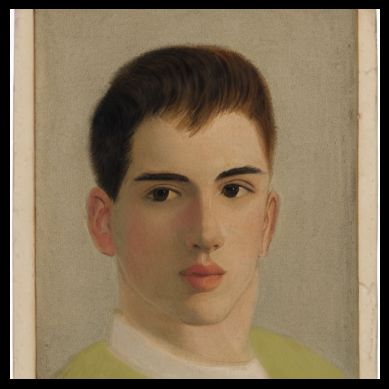

In [14]:
plt.imshow(image)
plt.axis('off')
plt.show()

Token indices sequence length is longer than the specified maximum sequence length for this model (110 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['sized lips with upper lip slightly thinner than lower . well - defined chin and strong jawline ; no double chin . visible average - sized ears ; no noticeable scars .']


  0%|          | 0/50 [00:00<?, ?it/s]

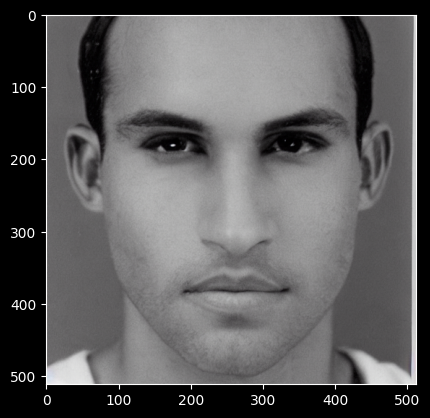

In [ ]:
prompt = """" Light-medium skintone male, oval face, neutral expression. Short dark brown thick hair, straight hairline, smooth forehead. 
Short well-groomed beard. Medium round dark brown eyes, average lashes. 
Medium-thick slightly arched dark brown brows. Straight medium nose, average lips with thinner upper lip. 
Strong jawline, defined chin, average ears, no scars.

"""

image = pipe(prompt).images[0]
image.save("geneGeated_face_inmate_prompt.png")
plt.axis('off')
plt.imshow(image)